<a href="https://colab.research.google.com/github/VedSorathiya/big_data_analytics_project/blob/main/BigDataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Java, Spark, and findspark
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz
!pip install -q findspark


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("Wine Hive Results Analysis") \
    .getOrCreate()


In [ ]:
df_avg_quality_red = spark.read.csv("/content/avg_quality_red.csv", inferSchema=True, header=False)
df_avg_quality_white = spark.read.csv("/content/avg_quality_white.csv", inferSchema=True, header=False)

df_quality_dist_red = spark.read.csv("/content/quality_distribution_red.csv", inferSchema=True, header=False)
df_quality_dist_white = spark.read.csv("/content/quality_distribution_white.csv", inferSchema=True, header=False)

df_avg_alcohol_red = spark.read.csv("/content/avg_alcohol_red.csv", inferSchema=True, header=False)
df_avg_alcohol_white = spark.read.csv("/content/avg_alcohol_white.csv", inferSchema=True, header=False)


In [ ]:
df_avg_quality_red = df_avg_quality_red.withColumnRenamed("_c0", "avg_quality")
df_avg_quality_white = df_avg_quality_white.withColumnRenamed("_c0", "avg_quality")

df_quality_dist_red = df_quality_dist_red.withColumnRenamed("_c0", "quality").withColumnRenamed("_c1", "count")
df_quality_dist_white = df_quality_dist_white.withColumnRenamed("_c0", "quality").withColumnRenamed("_c1", "count")

df_avg_alcohol_red = df_avg_alcohol_red.withColumnRenamed("_c0", "avg_alcohol_red")
df_avg_alcohol_white = df_avg_alcohol_white.withColumnRenamed("_c0", "avg_alcohol_white")



In [ ]:
df_avg_quality_red.show()
df_quality_dist_white.show()

+-----------------+
|      avg_quality|
+-----------------+
|5.636420525657071|
+-----------------+

+-------+-----+
|quality|count|
+-------+-----+
|      3|   20|
|      4|  163|
|      5| 1457|
|      6| 2197|
|      7|  880|
|      8|  175|
|      9|    5|
+-------+-----+



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [ ]:
pdf_avg_quality_red = df_avg_quality_red.toPandas()
pdf_avg_quality_white = df_avg_quality_white.toPandas()

pdf_quality_dist_red = df_quality_dist_red.toPandas()
pdf_quality_dist_white = df_quality_dist_white.toPandas()

pdf_avg_alcohol_red = df_avg_alcohol_red.toPandas()
pdf_avg_alcohol_white = df_avg_alcohol_white.toPandas()


<ipython-input-10-d0107a5ba8d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_quality, x='wine_type', y='avg_quality', palette='Reds')


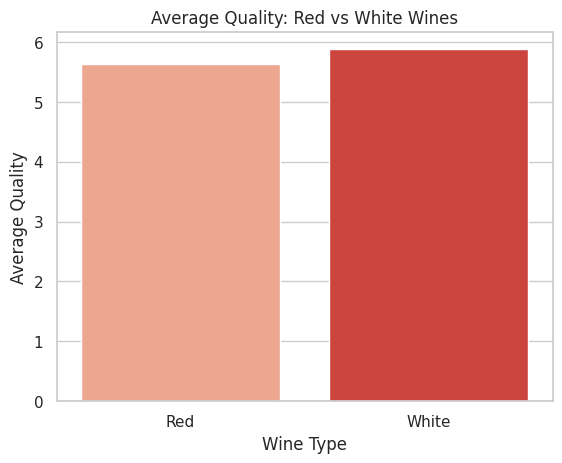

In [ ]:
avg_quality = pd.DataFrame({
    'wine_type': ['Red', 'White'],
    'avg_quality': [
        pdf_avg_quality_red['avg_quality'].values[0],
        pdf_avg_quality_white['avg_quality'].values[0]
    ]
})

sns.barplot(data=avg_quality, x='wine_type', y='avg_quality', palette='Reds')
plt.title("Average Quality: Red vs White Wines")
plt.ylabel("Average Quality")
plt.xlabel("Wine Type")
plt.show()


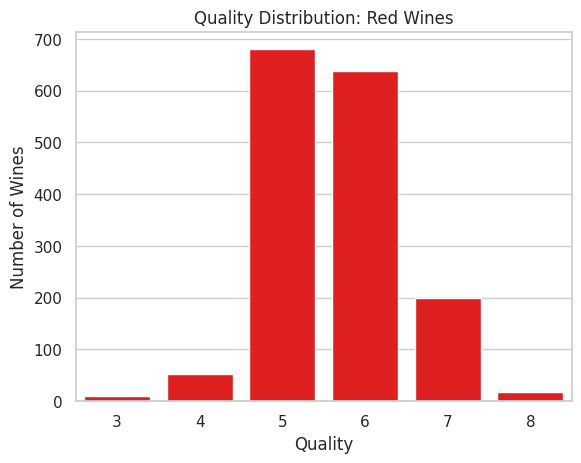

In [ ]:
sns.barplot(data=pdf_quality_dist_red, x='quality', y='count', color='red')
plt.title("Quality Distribution: Red Wines")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.show()


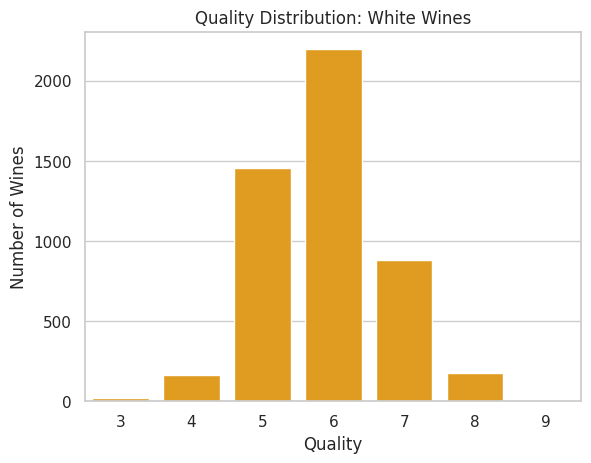

In [ ]:
sns.barplot(data=pdf_quality_dist_white, x='quality', y='count', color='orange')
plt.title("Quality Distribution: White Wines")
plt.xlabel("Quality")
plt.ylabel("Number of Wines")
plt.show()


<ipython-input-13-381dd732bf32>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_alcohol, x='wine_type', y='avg_alcohol', palette='muted')


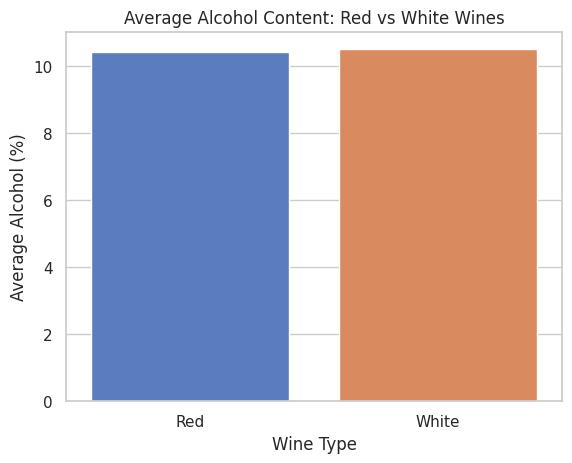

In [ ]:
avg_alcohol = pd.DataFrame({
    'wine_type': ['Red', 'White'],
    'avg_alcohol': [
        pdf_avg_alcohol_red['avg_alcohol_red'].values[0],
        pdf_avg_alcohol_white['avg_alcohol_white'].values[0]
    ]
})

sns.barplot(data=avg_alcohol, x='wine_type', y='avg_alcohol', palette='muted')
plt.title("Average Alcohol Content: Red vs White Wines")
plt.ylabel("Average Alcohol (%)")
plt.xlabel("Wine Type")
plt.show()


In [ ]:
# Read red and white wine datasets
df_red_full = pd.read_csv("/content/winequality-red.csv", sep=';')
df_white_full = pd.read_csv("/content/winequality-white.csv", sep=';')

# Add a 'type' column to distinguish them
df_red_full["type"] = "Red"
df_white_full["type"] = "White"

# Combine into one DataFrame
df_combined = pd.concat([df_red_full, df_white_full], axis=0)


<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


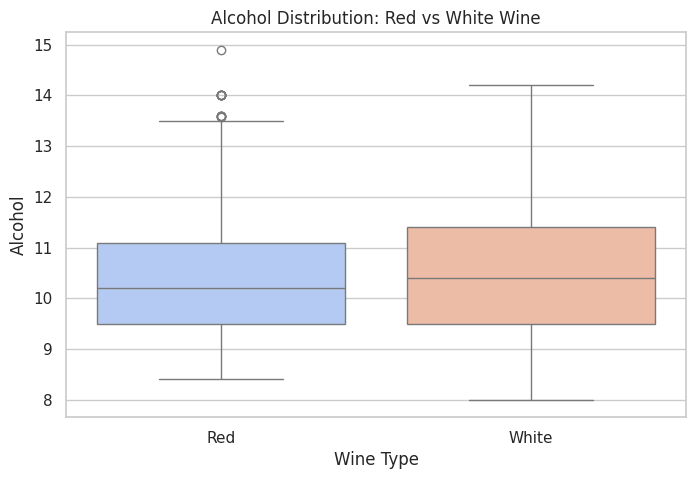

<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


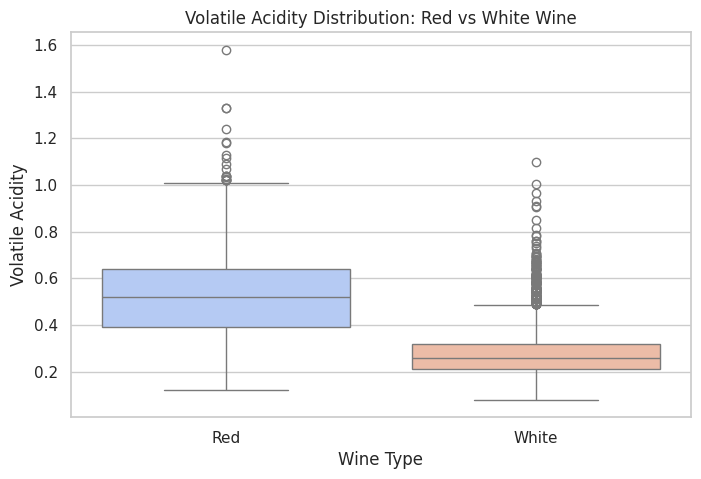

<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


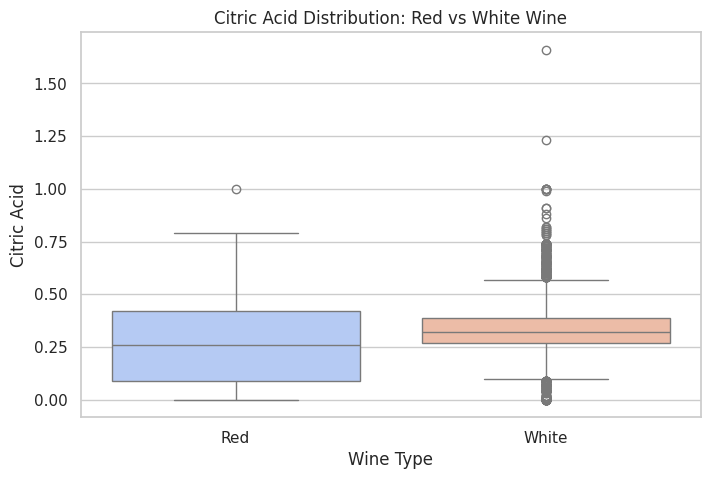

<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


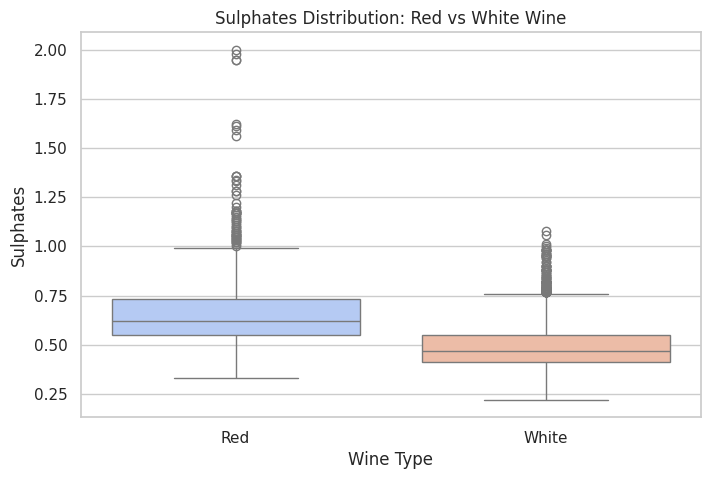

<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


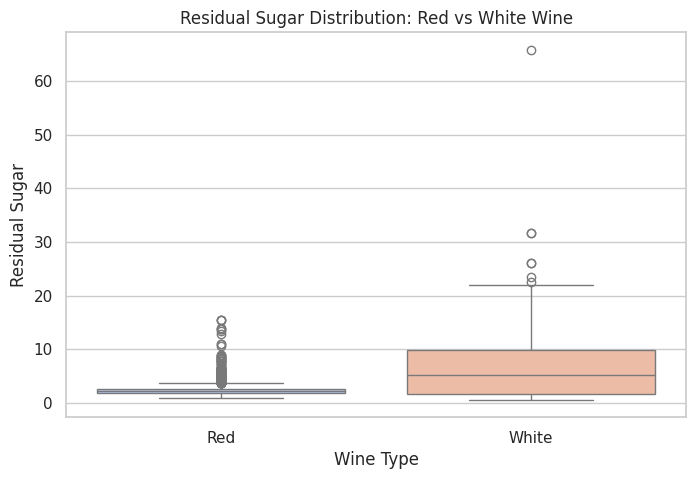

<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


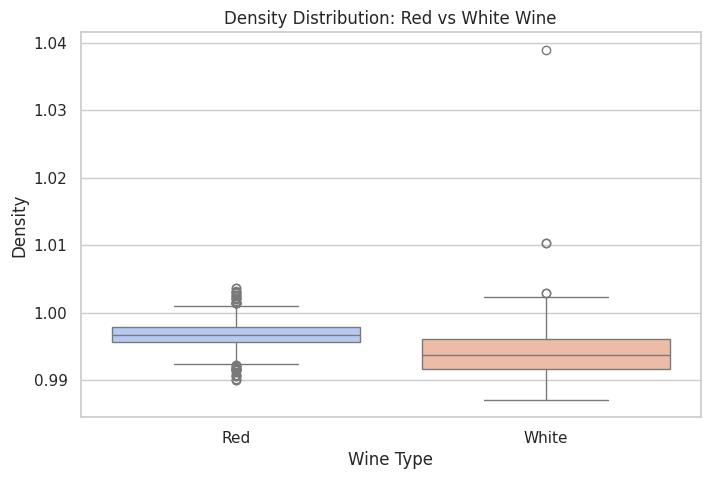

<ipython-input-15-a9840b58bfe8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")


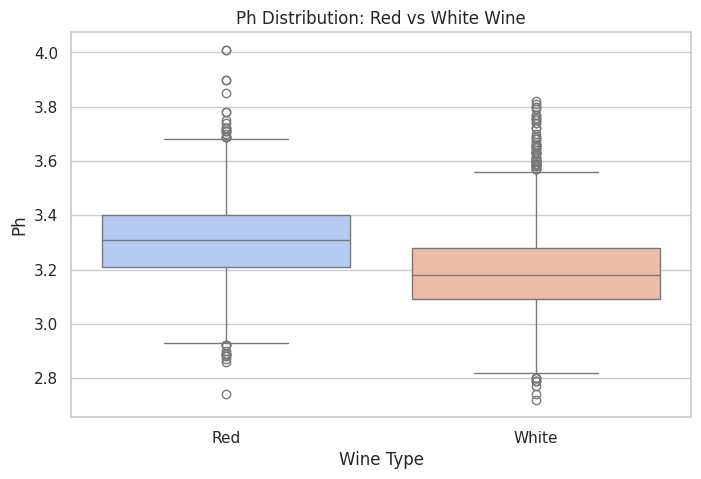

In [ ]:
features_to_compare = ["alcohol", "volatile acidity", "citric acid",
                       "sulphates", "residual sugar", "density", "pH"]

for feature in features_to_compare:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_combined, x="type", y=feature, palette="coolwarm")
    plt.title(f"{feature.title()} Distribution: Red vs White Wine")
    plt.xlabel("Wine Type")
    plt.ylabel(feature.title())
    plt.show()


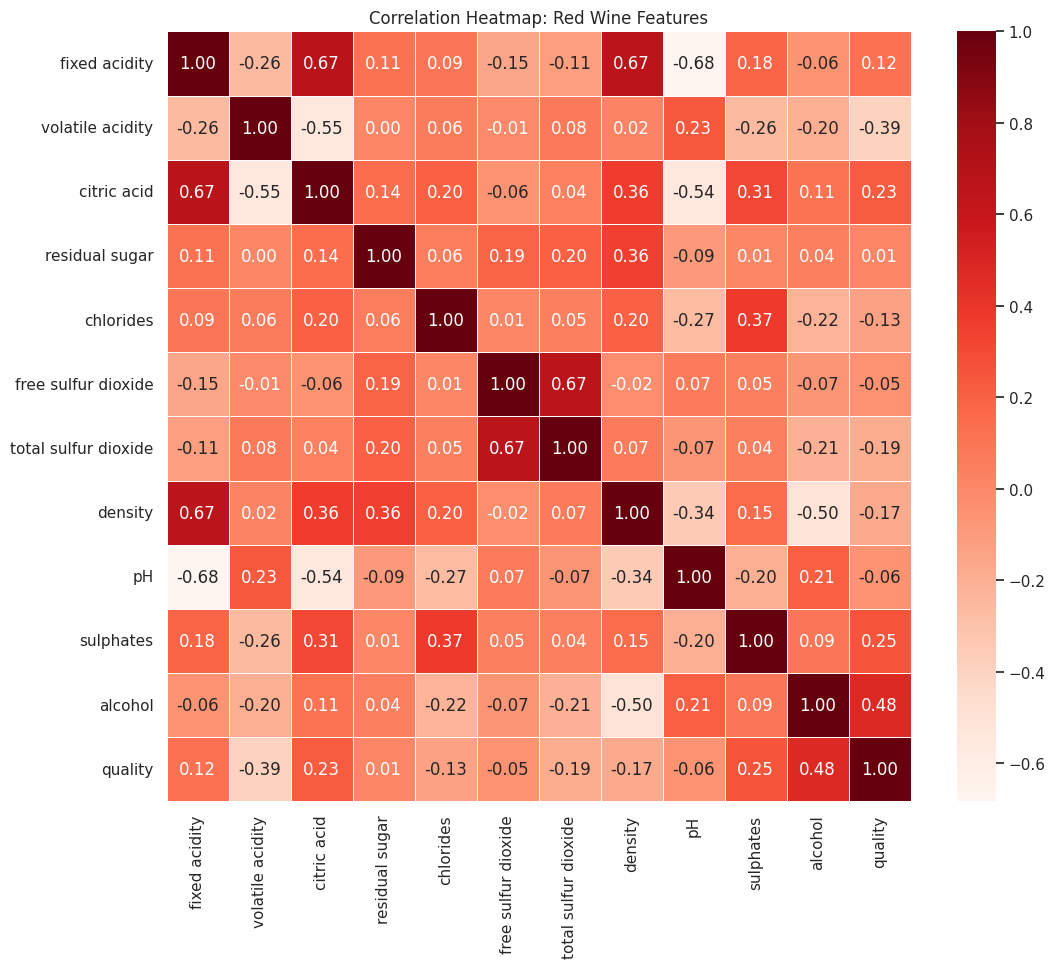

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_red_full.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Reds", linewidths=0.5)
plt.title("Correlation Heatmap: Red Wine Features")
plt.show()


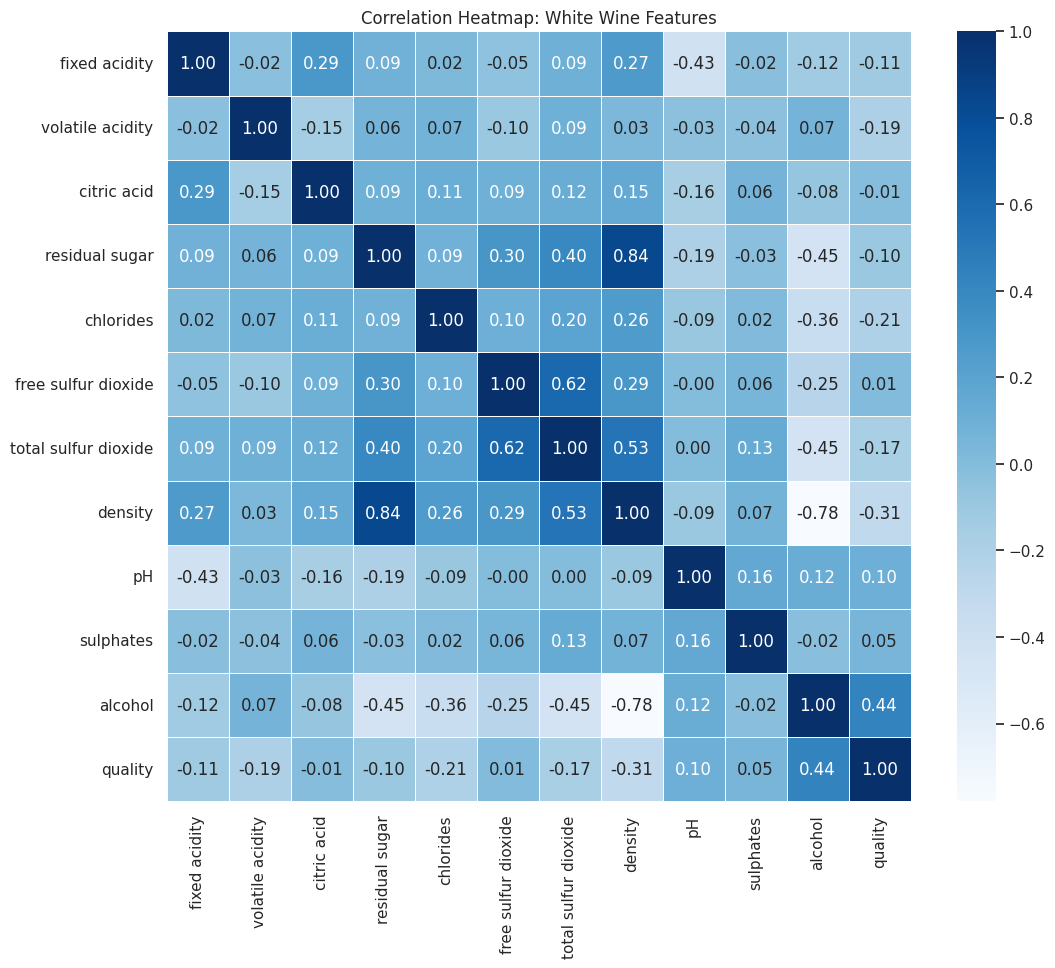

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_white_full.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap: White Wine Features")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128995 (\N{LARGE PURPLE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


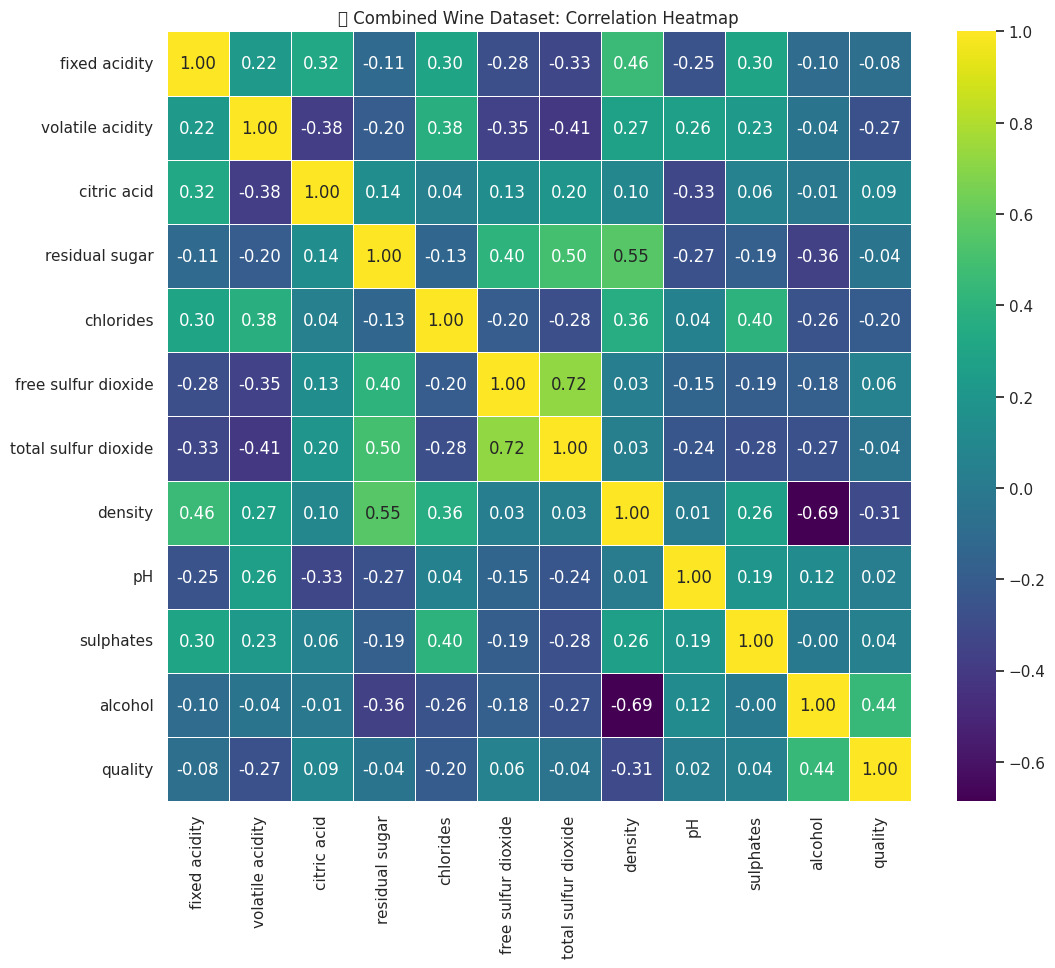

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_combined.drop(columns=["type"]).corr(numeric_only=True), annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("🟣 Combined Wine Dataset: Correlation Heatmap")
plt.show()


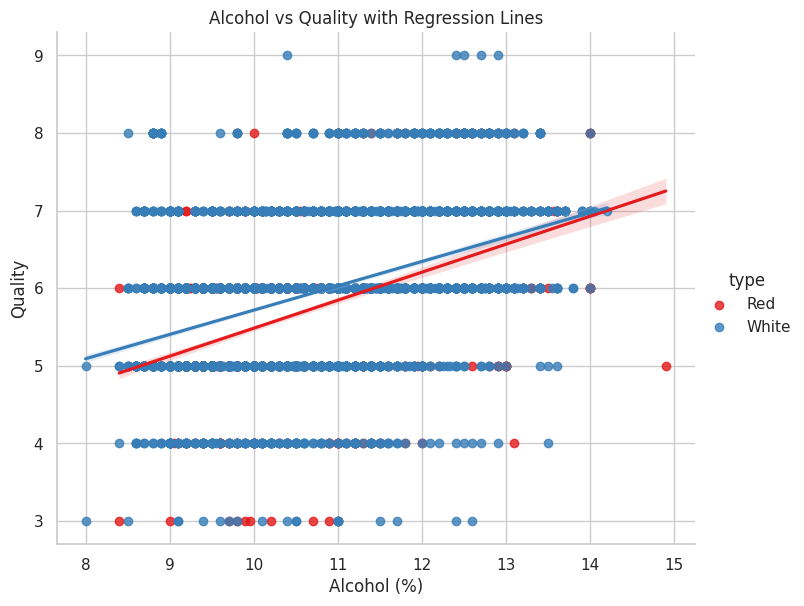

In [ ]:
sns.lmplot(data=df_combined, x="alcohol", y="quality", hue="type", palette="Set1", height=6, aspect=1.2)
plt.title("Alcohol vs Quality with Regression Lines")
plt.xlabel("Alcohol (%)")
plt.ylabel("Quality")
plt.show()
